# The aim of the software tool will be to automatically output some analysis results based on a user input. Where the input defines the type of analysis results the softwware will produce ranging from EDA to prediction. 

# 1. Importing the necessary libraries 

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

1. Reading and Loading the data 

Please choose an analysis output option:
1. Data visualization
2. Credit card acceptance
3. Line of best fit
4. Quit
Enter your choice: 1


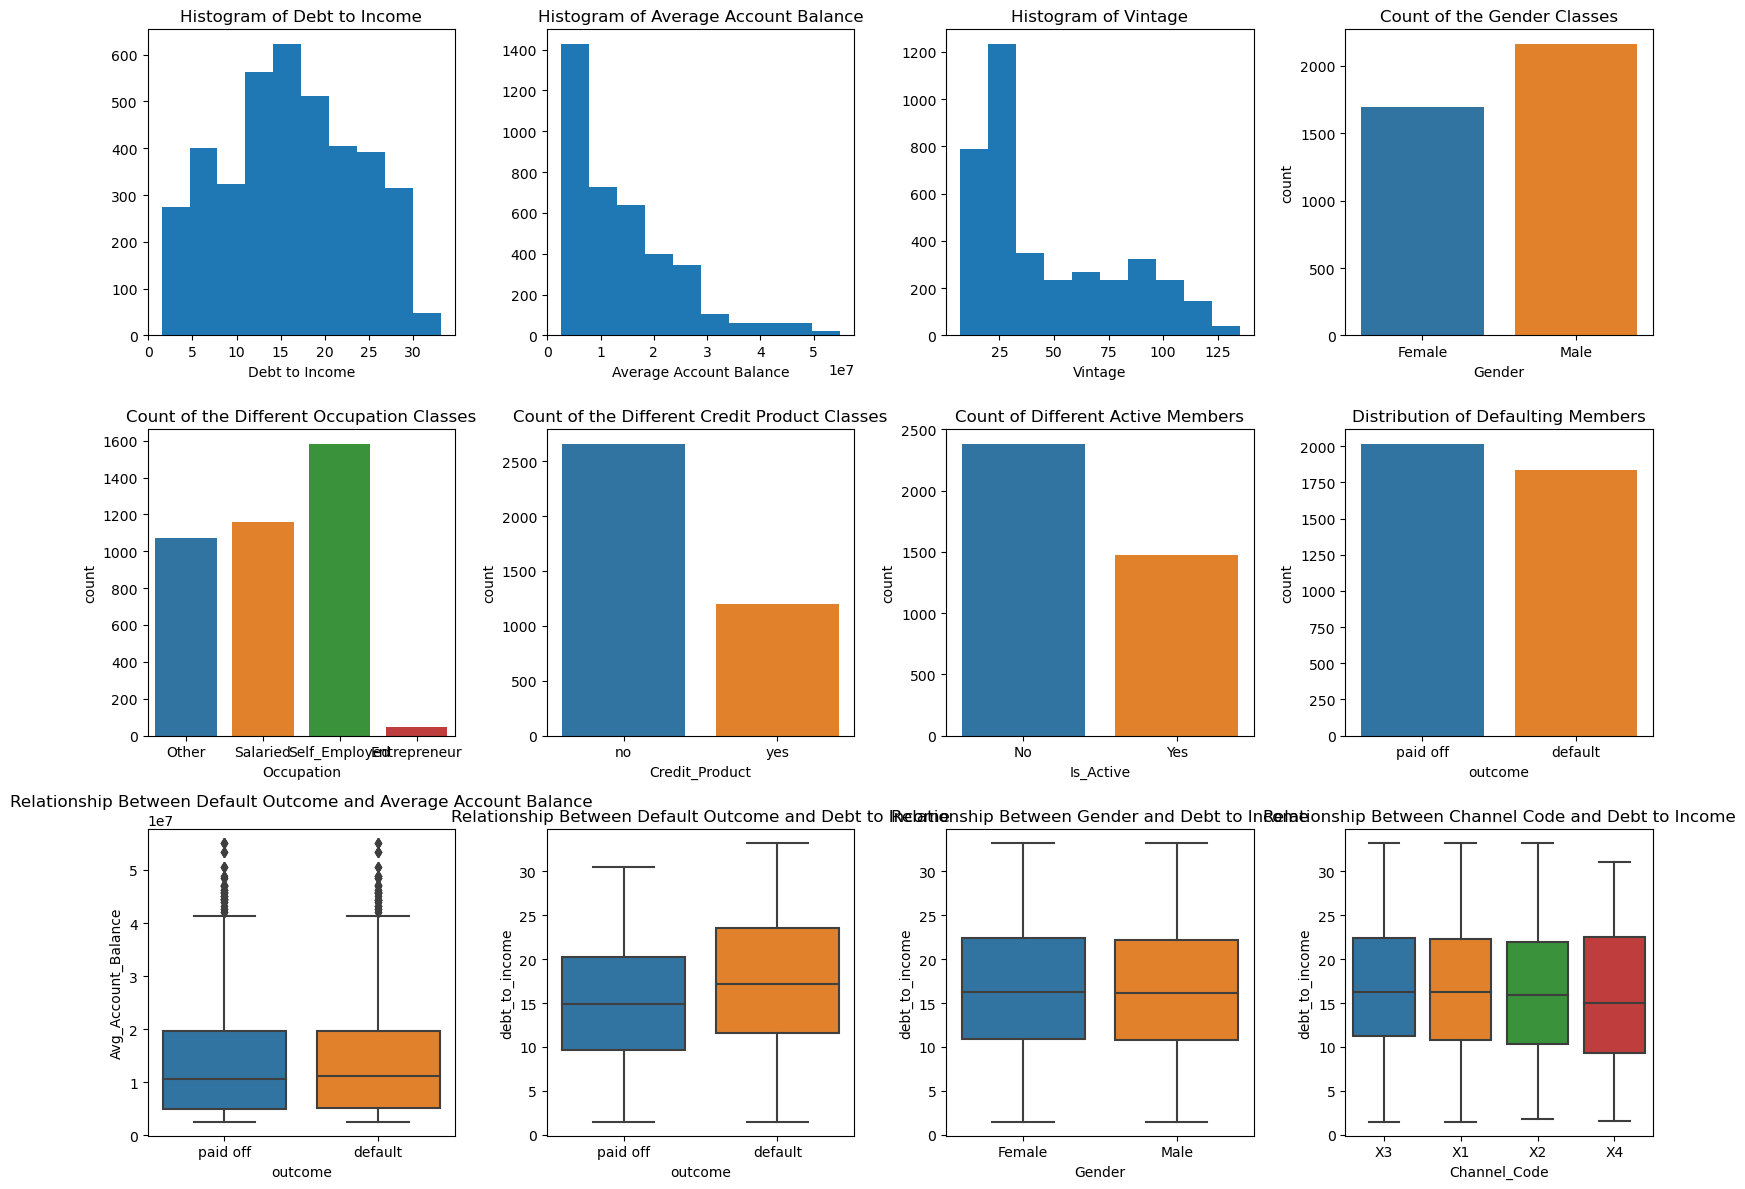

Please choose an analysis output option:
1. Data visualization
2. Credit card acceptance
3. Line of best fit
4. Quit


In [ ]:
def main():
    cc_data = pd.read_csv("C:/Users/HP/Desktop/Data analysis/creditcard.csv")
    cc_data = cc_data.dropna()
    cc_data['Credit_Product'] = cc_data['Credit_Product'].str.lower()

    # user input prompt that allows them to select a specific analysis output 
    while True:
        print('Please choose an analysis output option:')
        print('1. Data visualization')
        print('2. Credit card acceptance')
        print('3. Line of best fit')
        print('4. Quit')
        choice = input('Enter your choice: ')
        if choice == '1':
            # Call the function that performs the data visualization 
            data_visualization(cc_data)
        elif choice == '2':
            # Call the function that shows credit card acceptance
            credit_card_acceptance(cc_data)
        elif choice == '3':
            # Call the function that shows the line of best fit
            line_of_best_fit(cc_data)
        elif choice == '4':
            break
        else:
            print('Invalid choice. Please try again.')

def data_visualization(cc_data):
    plt.figure(figsize=(16, 12)) 
    
    plt.subplot(3, 4, 1)# this code format was adapted from : https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
    plt.hist(cc_data['debt_to_income'])
    plt.title('Histogram of Debt to Income')
    plt.xlabel('Debt to Income')
    
    plt.subplot(3, 4, 2)
    plt.hist(cc_data['Avg_Account_Balance'])
    plt.title('Histogram of Average Account Balance')
    plt.xlabel('Average Account Balance')
    
    plt.subplot(3, 4, 3)
    plt.hist(cc_data['Vintage'])
    plt.title('Histogram of Vintage')
    plt.xlabel('Vintage')
    
    plt.subplot(3, 4, 4)
    sns.countplot(x='Gender', data=cc_data)
    plt.title('Count of the Gender Classes')
    
    plt.subplot(3, 4, 5)
    sns.countplot(x='Occupation', data=cc_data)
    plt.title('Count of the Different Occupation Classes')
    
    plt.subplot(3, 4, 6)
    sns.countplot(x='Credit_Product', data=cc_data)
    plt.title('Count of the Different Credit Product Classes')
    
    plt.subplot(3, 4, 7)
    sns.countplot(x='Is_Active', data=cc_data)
    plt.title('Count of Different Active Members')
    
    plt.subplot(3, 4, 8)
    sns.countplot(x='outcome', data=cc_data)
    plt.title('Distribution of Defaulting Members')
    
    plt.subplot(3, 4, 9)
    sns.boxplot(x='outcome', y='Avg_Account_Balance', data=cc_data)
    plt.title('Relationship Between Default Outcome and Average Account Balance')
    
    plt.subplot(3, 4, 10)
    sns.boxplot(x='outcome', y='debt_to_income', data=cc_data)
    plt.title('Relationship Between Default Outcome and Debt to Income')
    
    plt.subplot(3, 4, 11)
    sns.boxplot(x='Gender', y='debt_to_income', data=cc_data)
    plt.title('Relationship Between Gender and Debt to Income')
    
    plt.subplot(3, 4, 12)
    sns.boxplot(x='Channel_Code', y='debt_to_income', data=cc_data)
    plt.title('Relationship Between Channel Code and Debt to Income')
    
    plt.tight_layout()
    plt.show()

    
# Credit card acceptance 
def credit_card_acceptance(cc_data):
    # Filter the data to show only customers who are eligible for the gold card
    eligible_customers = cc_data[(cc_data['Is_Active'] =='Yes') & (cc_data['Credit_Product'] == 'yes') & (cc_data['Avg_Account_Balance'] > 8000000) & (cc_data['Occupation'] == 'Salaried')]
    
    # Display the eligible customers
    print(eligible_customers)
# Creating the line of best fit and predictions 

def line_of_best_fit(cc_data):
     # 1. The first step will be to create a regression model with age as the predictor and average account balance as the response variable
    X = cc_data['Age']
    y = cc_data['Avg_Account_Balance']
    m, b = np.polyfit(X, y, 1)

    #2. Creating a scatter plot with a line of best fit based on the regression results 
    ## code adapted from : https://levelup.gitconnected.com/fully-explained-polyfit-method-for-machine-learning-predictions-348aaa5f5158
    plt.scatter(X, y)
    plt.plot(X, m*X + b)
    plt.title('Linear Regression of Age vs. Average Account Balance')
    plt.xlabel('Age')
    plt.ylabel('Average Account Balance')
    plt.show()

    #3. Using the line of best fit to predict the average account balance for members with ages 30, 50, and 80
    ages = [30, 50, 80]
    for age in ages:
        prediction = m*age + b
        print(f'The predicted average account balance for age {age} is {prediction:.2f}')

if __name__ == '__main__':
    main()

    